In [12]:
from fastai.vision.all import get_image_files, parent_label, ImageDataLoaders, CropPad, error_rate, vision_learner, resnet34, ClassificationInterpretation

In [13]:
files = get_image_files("./data/generated/")
files[0], files[2], files[4], len(files)

(Path('data/generated/both/r1002o159.png'),
 Path('data/generated/both/r1002o265.png'),
 Path('data/generated/both/r1006o159.png'),
 9396)

In [14]:
dls = ImageDataLoaders.from_path_func("./data/generated/",files, parent_label )

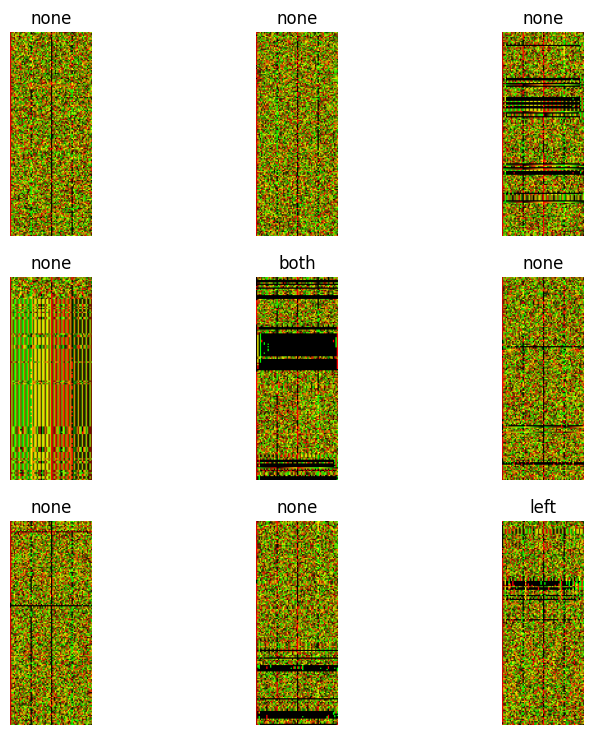

In [15]:
dls.show_batch()

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.00363078061491251)

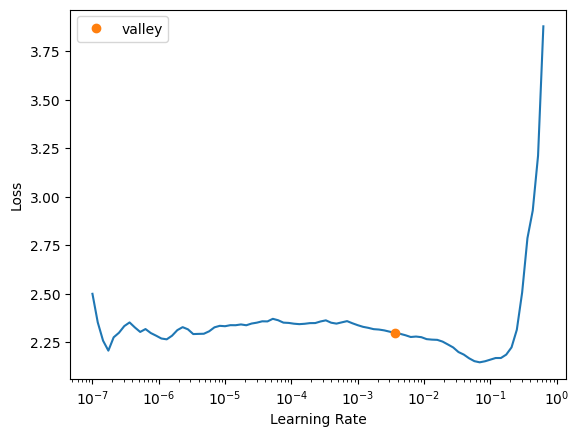

In [17]:
learn.lr_find()

In [18]:
learn.fine_tune(40, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.622427,1.102376,0.333688,02:34


epoch,train_loss,valid_loss,error_rate,time
0,1.066650,0.913752,0.276211,03:27
1,0.890894,0.956324,0.277807,03:25
2,0.737625,1.089646,0.315061,03:29
3,0.518474,1.302852,0.345929,04:28
4,0.347965,1.592087,0.373603,03:34
5,0.300021,1.850121,0.370410,03:27
6,0.298502,1.762782,0.373603,03:27
7,0.264692,1.870583,0.324109,03:29
8,0.244557,1.880462,0.385311,03:32
9,0.235776,1.834848,0.373071,03:24


KeyboardInterrupt: 

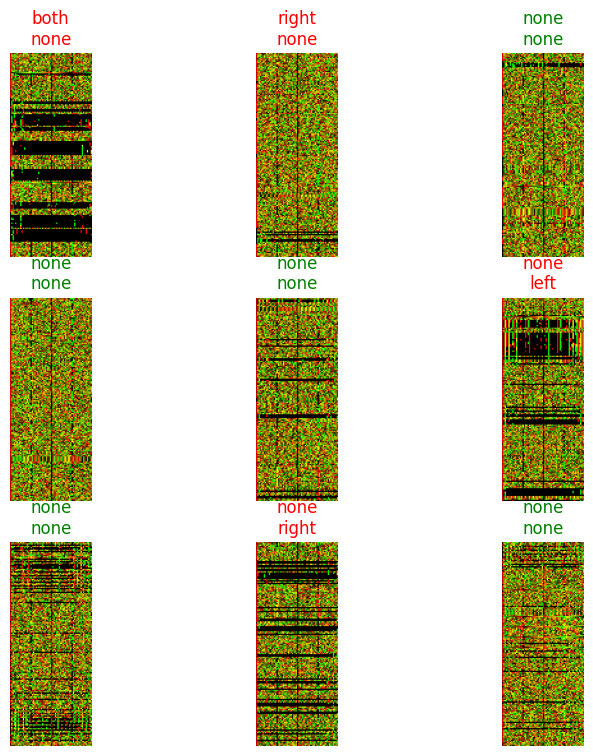

In [19]:
learn.show_results()

In [20]:
learn.predict(files[0]), files[0]

(('both', tensor(0), tensor([7.3224e-01, 5.6756e-03, 2.6153e-01, 5.5752e-04])),
 Path('data/generated/both/r1002o159.png'))

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

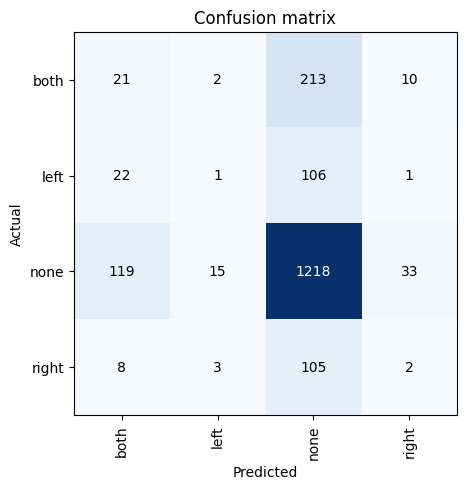

In [23]:
interp.plot_confusion_matrix()